Importing the necessary libraries to perform analysis
- numpy and pandas are used for data manipulation
- matplotlib and seaborn are used for data visualization
- classification algorithm such as Logistic Regression, Decision Tree Classifier and Random Forest Classifier are used.
- Evaluation matrix such as confusion matrix, accuracy score and classification report are used to evaluate the model performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

reading the csv file

In [4]:
df = pd.read_csv("D:\\apple_quality\\apple_quality.csv")

- A_id: An identifier for each record.
- Size: Represents the size of the fruit, possibly in a standardized unit.
- Weight: Indicates the weight of the fruit, possibly in a standardized unit.
- Sweetness: Measures the sweetness of the fruit, likely on a scale.
- Crunchiness: Indicates the level of crunchiness or texture of the fruit.
- Juiciness: Measures the juiciness of the fruit, possibly on a scale.
- Ripeness: Indicates the ripeness of the fruit, possibly on a scale or category.
- Acidity: Measures the acidity of the fruit, possibly on a scale.
- Quality: Represents the overall quality of the fruit, possibly categorized as 'good' or 'bad'.

In [5]:
df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
0                          -0.491590483    good  
1                          -0.722809367    good  
2                           2.621636473     bad  
3                           0.790723217    good  
4                           0.501984036    good  
...                                 ...     ...  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN  

[4001 rows x 9 columns]

- Shape indicates the no of rows and columns
- head displays the top 5 rows of the dataset.
- tail displays the bottom 5 rows of the dataset.
- describes gives the statistical summary of the dataset.
- info displays the information like how many values are present, if there is non null values and also the datatype of the column.


In [6]:
df.shape

(4001, 9)

In [7]:
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [8]:
df.tail()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN

In [9]:
df.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


- duplicates checks for the presence of duplicate values.
- isna checks whether nan value is present.

In [11]:
df[df.duplicated()].sum()

A_id           0.0
Size           0.0
Weight         0.0
Sweetness      0.0
Crunchiness    0.0
Juiciness      0.0
Ripeness       0.0
Acidity        0.0
Quality        0.0
dtype: float64

In [12]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [15]:

df['Acidity'] = df['Acidity'].astype('float')

<Axes: >

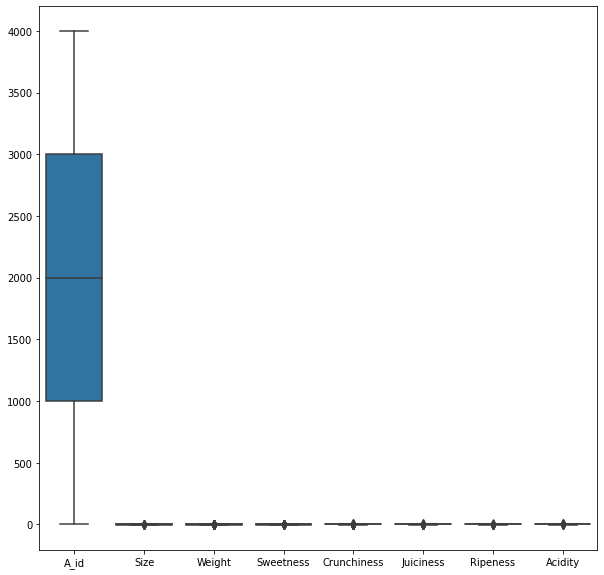

In [16]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df)

- countplot is used for visualization of univariate categorical variable.
- its gives the count of each categorical variable.

<Axes: xlabel='Quality', ylabel='count'>

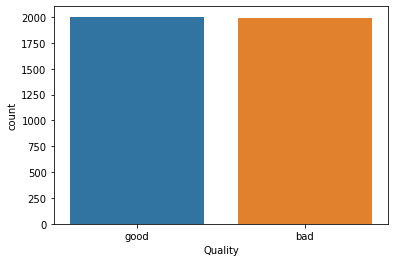

In [17]:
sns.countplot(data = df, x = 'Quality')

- distplot is used for visualization of univariate numeric variable its shows frequency distribution along with kde curve. 

<Axes: ylabel='Density'>

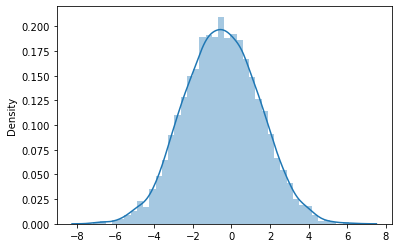

In [18]:
sns.distplot(x = df['Size'],label  = 'size')

- histplot shows the frequency distribution of single numeric variable.

<Axes: xlabel='Size', ylabel='Count'>

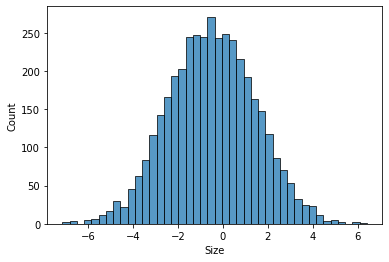

In [19]:
sns.histplot(data = df, x = 'Size')

- regression plot shows the relationship between two numeric variables.
- here as the weight of the apple increases the sweetnees decreases.

<Axes: xlabel='Weight', ylabel='Sweetness'>

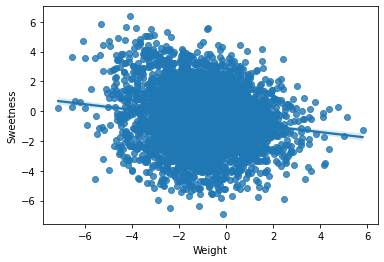

In [20]:
sns.regplot(data = df, x = 'Weight', y = 'Sweetness')

- here as the crunchiness of the apple increases,acidity slightly increases.

<Axes: xlabel='Crunchiness', ylabel='Acidity'>

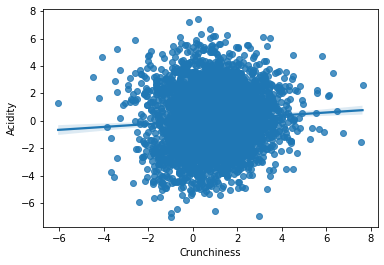

In [21]:
sns.regplot(data = df, x = 'Crunchiness',y = 'Acidity')

- correlations shows the strength and direction of two numeric variables.


In [22]:
da = df.corr()
da

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   
Acidity     -0.022237  0.196218  0.016414   0.085999     0.069943   0.248714   

             Ripeness   Acidity  
A_id         0.000742 -0.022237  
Size        -0.134773  0.196218  
Weight      -0.243824  0.016414  
Sweetness   -0.273800  0.085999  
Crunchiness -0.201982  0.069943  
Juiciness   -0.097144  0.248714  
Ripeness     1.000000 -0.202669  
Acidity     -0.202669  1.000000

- heatmap is the graphical representation of correlation matrix.

<Axes: >

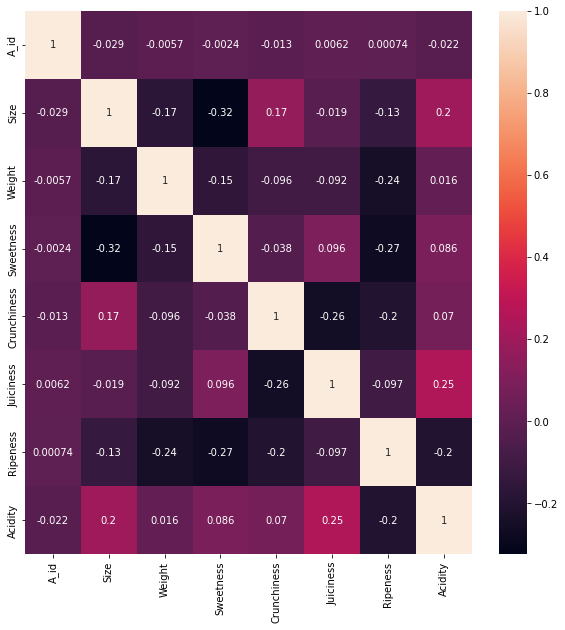

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(data = da,annot = True)

In [24]:
df['Quality'] = df['Quality'].replace({'bad':0,'good':1})

In [25]:
df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  Quality  
0    -0.491590        1  
1    -0.722809        1  
2     2.621636        0  
3     0.790723        1  
4     0.501984        1  
...        ...      ...  
3995  0.137784        0  
3996  1.854235        1  
3997 -1.334611        0  
3998 -2.229720        1  
3999  1.599796        1  

[4000 rows x 9 columns]

In [26]:
da1 = df.corr()
da1['Quality']

A_id           0.004875
Size           0.244007
Weight         0.001421
Sweetness      0.250998
Crunchiness   -0.012376
Juiciness      0.260223
Ripeness      -0.264315
Acidity       -0.007697
Quality        1.000000
Name: Quality, dtype: float64

<Axes: >

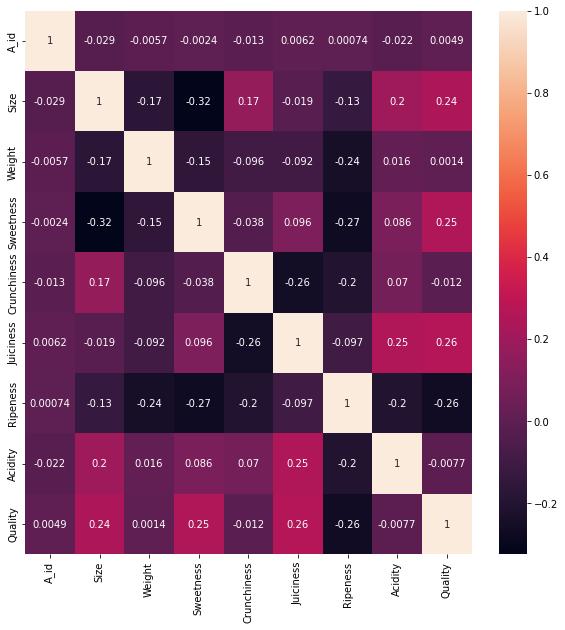

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(data = da1, annot = True)

In [28]:
df.drop('A_id',axis = 1,inplace = True)

- here we are splitting the data into train and test, training the model on train data.
- from x that is independent variable we are dropping the target variable.
-  y that is dependent variable
- dataset is split into 70 % of training data and 30% of testing data.

In [29]:
x = df.drop('Quality',axis = 1)
y = df['Quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

con = confusion_matrix(y_test,y_pred)
print(con)

cla = classification_report(y_test,y_pred)
print(cla)

acc = accuracy_score(y_test,y_pred)
print("accuracy score", acc)

[[446 172]
 [113 469]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       618
           1       0.73      0.81      0.77       582

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.77      0.76      0.76      1200

accuracy score 0.7625


- The confusion matrix shows how many instances were correctly or incorrectly classified as each class.
- The classification report provides precision, recall, and F1-score for each class, along with the overall accuracy score.
- The accuracy score is 0.7625, indicating that the model correctly predicted the class for 76.25% of the instances in the test dataset.

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

con = confusion_matrix(y_test,y_pred)
print(con)

cla = classification_report(y_test,y_pred)
print(cla)

acc = accuracy_score(y_test,y_pred)
print("accuracy score", acc)

[[507 111]
 [110 472]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       618
           1       0.81      0.81      0.81       582

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200

accuracy score 0.8158333333333333


- The confusion matrix shows 504 true negatives, 114 false positives, 105 false negatives, and 477 true positives, indicating a better performance than the previous model.

- The classification report indicates improved precision, recall, and F1-score for both classes ('0' and '1'), with an overall accuracy score of 0.8175, showing a better overall performance compared to the previous model.

- The accuracy score is 0.8175, indicating that the model correctly predicted the class for 81.75% of the instances in the test dataset.

In [32]:
rt = RandomForestClassifier()
rt.fit(x_train,y_train)
y_pred = rt.predict(x_test)

con = confusion_matrix(y_test,y_pred)
print(con)

cla = classification_report(y_test,y_pred)
print(cla)

acc = accuracy_score(y_test,y_pred)
print("accuracy score", acc)

[[543  75]
 [ 51 531]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       618
           1       0.88      0.91      0.89       582

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.89      1200
weighted avg       0.90      0.90      0.90      1200

accuracy score 0.895


- The confusion matrix shows 550 true negatives, 68 false positives, 45 false negatives, and 537 true positives, indicating a further improvement in performance.

- The classification report indicates high precision, recall, and F1-score for both classes ('0' and '1'), with an overall accuracy score of 0.9058, showing a substantial improvement in overall performance compared to the previous models.
- The accuracy score is 0.9058, indicating that the model correctly predicted the class for 90.58% of the instances in the test dataset.






